In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
'''--------- 1. Data Manipulation ---------'''
import numpy as np
import pandas as pd
'''--------- 2. Data Preprocessing ---------'''
from sklearn.preprocessing import LabelEncoder #Encode Non-numeric Var
from sklearn.preprocessing import MinMaxScaler # Feature Scaling
from sklearn.model_selection import train_test_split #Train Test Validation Split
'''--------- 3. Data Visualization ---------'''
import matplotlib.pyplot as plt
'''--------- 4. Model Training ---------'''
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
'''--------- 5. Model Evluation ---------'''
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### Dataset 2
**About dataset**
- 400 ~30 second audio clips gathered from erbal and non-verbal music from different genres of Turkish music
- Annotated into 4 quadrants based on valance and arousal according to Russell's model.
- Audios are organized in 4 categories - Happy, Sad, Angry, Relax
- Equally stratified dataset with each classes 100 songs

**Acknowledgements**<br>
source:https://www.kaggle.com/datasets/blaler/turkish-music-emotion-dataset

**If you use it, please cite the following article(s):**<br>
Bilal Er, M., & Aydilek, I. B. (2019). Music emotion recognition by using chroma spectrogram and deep visual features. Journal of Computational Intelligent Systems, 12(2), 1622–1634. International Journal of Computational Intelligence Systems, DOI: [Web Link] https://doi.org/10.2991/ijcis.d.191216.001

In [3]:
# Read dataset2
df2 = pd.read_excel("Features1D/Features.xlsx")
df2

,Unnamed: 0,file,scale,key,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,...,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20,mood
0,0,Dataset25/angry\adanali.mp3,major,A,123.046875,0.127807,0.002374,0.425633,0.086968,2105.443209,...,25.576569,-0.016703,25.722586,2.201685,22.017639,-1.431247,28.176865,-1.176676,20.433548,angry
1,1,Dataset25/angry\adanli2.mp3,major,D,99.384014,0.128979,0.002421,0.420374,0.074643,1000.227413,...,31.241302,-1.229543,35.786133,1.883627,39.709461,-1.683304,23.725592,0.727901,31.463917,angry
2,2,Dataset25/angry\adini_Feriha_koydum.mp3,major,B,135.999178,0.075881,0.000777,0.394874,0.077484,1843.214438,...,21.989450,-4.449482,21.054407,2.660801,17.766880,-6.313827,22.356897,-0.020581,24.623358,angry
3,3,Dataset25/angry\aksiyon_gerilim.mp3,major,A,151.999081,0.381500,0.017487,0.511473,0.086292,3106.736263,...,104.935028,8.481378,100.465881,9.546239,68.734306,1.664868,43.591545,3.473514,49.230965,angry
4,4,Dataset25/angry\araf_zaman_dizi_muzigi.mp3,major,A,123.046875,0.202227,0.001329,0.377677,0.072657,1589.239435,...,23.533150,-1.828742,26.620646,4.007443,26.666252,-0.988054,23.702585,4.246670,26.136576,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Dataset25/sad\yazimi_kisa_cevirdin_muhlis_berb...,major,A,151.999081,0.097105,0.000582,0.293956,0.088207,1997.276683,...,52.399574,-18.951229,71.105469,-6.146902,61.915462,-16.994026,55.398777,-14.183487,64.577766,sad
496,496,Dataset25/sad\yemen_turkusu.mp3,minor,G#,89.102909,0.083837,0.001618,0.272150,0.084929,1331.011559,...,37.900272,-11.959914,43.625828,-5.335443,40.348934,-10.943409,37.393105,-15.349642,56.387405,sad
497,497,Dataset25/sad\yol_ver_daglar_arif_sag.mp3,major,E,99.384014,0.076661,0.000290,0.237400,0.089330,1681.161502,...,46.293671,-5.706831,39.779736,-3.286500,47.729607,1.990399,70.187508,5.452133,70.151512,sad
498,498,Dataset25/sad\yuce_dag_basinda_yanar_bir_isik_...,major,A,99.384014,0.071242,0.001089,0.263051,0.092084,2075.571372,...,45.630795,-16.532892,45.669136,-11.235711,48.995541,-15.730806,54.862488,-15.158969,68.118652,sad


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     500 non-null    int64  
 1   file           500 non-null    object 
 2   scale          500 non-null    object 
 3   key            500 non-null    object 
 4   tempo          500 non-null    float64
 5   rms_mean       500 non-null    float64
 6   rms_var        500 non-null    float64
 7   chroma_mean    500 non-null    float64
 8   chroma_var     500 non-null    float64
 9   centroid_mean  500 non-null    float64
 10  centroid_var   500 non-null    float64
 11  rolloff_mean   500 non-null    float64
 12  roll_off_var   500 non-null    float64
 13  zcr_mean       500 non-null    float64
 14  zcr_var        500 non-null    float64
 15  tonnetz_mean   500 non-null    float64
 16  tonnetz_var    500 non-null    float64
 17  mel_mean       500 non-null    float64
 18  mel_var   

In [5]:
df2.describe()

,Unnamed: 0,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,centroid_var,rolloff_mean,roll_off_var,...,mfcc_mean_16,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,5.000000e+02,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,120.395197,0.116869,0.002610,0.343292,0.084798,1668.311026,3.214491e+05,3365.881314,1.634849e+06,...,-0.430237,57.411070,-3.837680,57.320411,-0.244337,59.910640,-3.588745,63.899293,-0.429178,69.647001
std,144.481833,20.898325,0.059637,0.003381,0.101563,0.008580,689.692712,3.074005e+05,1581.649710,1.471419e+06,...,4.932478,39.696133,5.290772,38.858742,5.300261,39.766392,5.354648,42.113503,5.414775,49.896144
min,0.000000,33.999794,0.006621,0.000022,0.160259,0.047596,163.830532,8.299295e+03,206.985221,1.567337e+04,...,-15.610699,7.937813,-24.893364,13.792374,-16.672737,5.940169,-30.015142,8.014700,-18.626137,13.516327
25%,124.750000,106.589355,0.071237,0.000722,0.270003,0.081013,1151.420533,1.250368e+05,2154.072211,5.963827e+05,...,-3.255613,31.845476,-7.134056,30.604404,-3.197288,32.159289,-6.238721,35.523054,-3.699433,34.763257
50%,249.500000,117.453835,0.107466,0.001566,0.326004,0.085988,1625.869596,2.188663e+05,3279.664563,1.204243e+06,...,-0.036742,48.418648,-4.048429,47.127392,-0.068088,50.564163,-3.444308,53.747274,-0.240833,57.556631
75%,374.250000,130.899208,0.156254,0.003098,0.402558,0.090014,2161.708013,4.226895e+05,4549.944757,2.181722e+06,...,2.722093,70.406668,-0.521758,69.277943,3.064685,73.905800,-0.808482,79.707708,2.390816,89.479397
max,499.000000,198.768029,0.381500,0.039725,0.671619,0.113631,3498.680881,2.039381e+06,6959.760493,8.731942e+06,...,18.586473,358.093842,16.780653,302.761444,23.927267,303.582184,27.736044,280.381042,23.513090,442.129852


In [6]:
df2.groupby('mood').mean()

,Unnamed: 0,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,centroid_var,rolloff_mean,roll_off_var,...,mfcc_mean_16,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20
mood,,,,,,,,,,,,,,,,,,,,,
angry,49.5,119.791301,0.143683,0.002207,0.411707,0.078808,1682.190407,246728.805076,3599.547643,1.383827e+06,...,1.716234,29.764316,-2.571726,30.968135,1.447801,31.123624,-2.522098,32.987506,0.481684,35.660978
fear,149.5,117.362657,0.109265,0.004573,0.388548,0.082577,1131.599525,335046.058790,2107.934238,1.483624e+06,...,1.891489,48.596364,-0.211073,48.996520,1.213213,51.297225,-0.174988,54.092575,1.250011,54.720373
happy,249.5,119.642832,0.133122,0.002388,0.370829,0.084728,2494.002767,294058.369451,5204.543552,1.297782e+06,...,-0.320848,51.621370,-5.706828,53.341666,0.194046,54.846162,-4.663032,61.449010,0.325332,64.571930
relax,349.5,121.566391,0.098366,0.002285,0.282407,0.089781,1330.465063,493934.269821,2562.747229,2.661879e+06,...,-2.757191,80.247970,-4.782265,79.222677,-2.434443,79.814637,-5.031492,82.774596,-2.542917,91.384084
sad,449.5,123.612802,0.099908,0.001595,0.262969,0.088094,1703.297369,237478.189159,3354.633909,1.347131e+06,...,-2.680867,76.825329,-5.916506,74.073058,-1.642302,82.471553,-5.552116,88.192779,-1.659999,101.897642


## 2. Data preprocessing
### 2.1 Define Features and Labels

In [7]:
X2 = df2.drop(['mood'],axis=1)
y2 = df2['mood']
np.unique(y2)

array(['angry', 'fear', 'happy', 'relax', 'sad'], dtype=object)

### 2.2 Encode the non-numerical features labels

**Encode the labels in numerical way:**
- Happy: 1 
- Angry: 0 
- Relaxed: 2 
- Sad: 3

In [8]:
le = LabelEncoder()

In [9]:
le.fit(y2)
y2 = le.transform(y2)
np.unique(y2)

array([0, 1, 2, 3, 4])

**Then encode the non-numeric variable scale:**
- major: 0
- minor: 1

In [10]:
X2['scale'].unique()

array(['major', 'minor'], dtype=object)

In [11]:
le.fit(X2['scale'])
X2['scale'] = le.transform(X2['scale'])
X2['scale'].unique()

array([0, 1])

**Finally, encode the non-numeric variable key:**
- A: 0
- A#: 1
- B: 2
- C: 3
- C#: 4
- D: 5
- D#: 6
- E: 7
- F: 8
- F#: 9
- G: 10
- G#: 11

In [12]:
X2['key'].unique()

array(['A', 'D', 'B', 'C#', 'E', 'D#', 'G', 'F', 'C', 'G#', 'A#', 'F#'],
      dtype=object)

In [13]:
le.fit(X2['key'])
X2['key'] = le.transform(X2['key'])
X2['key'].unique()

array([ 0,  5,  2,  4,  7,  6, 10,  8,  3, 11,  1,  9])

### 2.3 Train Test Validation Split
Finally, split the dataset into train and test set, 80% of data are used as train set, 10% of data are used as test set and the remaining ones are used for validation set.

In [14]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    train_size = 0.9, 
                                                    random_state = 13, 
                                                    shuffle = True, 
                                                    stratify = y2)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, 
                                                train_size = 0.8, 
                                                random_state = 13, 
                                                shuffle = True, 
                                                stratify = y2_train)

### 2.4 Feature Scaling
As the range of the variales varies distinctly, in order to make the learning process better, the features need to be scaled into similar ranges. Here the Min-Max Scaler is used.

In [15]:
scaler = MinMaxScaler()

In [16]:
X2_train_scaled = scaler.fit_transform(X2_train.drop('file',axis=1))
X2_val_scaled = scaler.fit_transform(X2_val.drop('file',axis=1))
X2_test_scaled = scaler.fit_transform(X2_test.drop('file',axis=1))

## 3. Train the model

In [17]:
# Define Model Builder of 3 conv1D layers and 2 fully connected layers
# Input data and paras of layers are changable

def modelBuilder3L(X_train,
                  f1,k1,a1,
                  f2,k2,a2,
                  f3,k3,a3,
                  d1,dr1,da1,r1,
                  d2,dr2,da2,r2,
                  num):
    '''
    args:
    
    X_train: training data
    f1,k1,a1: num of filters, filter size and activation func of 1st conv1D layer
    f2,k2,a2: num of filters, filter size and activation func of 2nd conv1D layer
    f3,k3,a3: num of filters, filter size and activation func of 3rd conv1D layer
    d1,dr1,da1, r1: num of units, dropout, activation func and regularizer para of 1st fully connected layer
    d2,dr2,da2, r2: num of units, dropout, activation func and regularizer para of 2nd fully connected layer
    num: integer for distinguishing different model
    
    return:
    model
    
    '''
    model = Sequential(name="Conv1D_"+str(num))
    m,n = X_train.shape
    #layer 1
    model.add(Conv1D(filters = f1, kernel_size = k1, input_shape = (n,1), padding = 'same', activation = a1, name ='Conv1D_1'))
    model.add(BatchNormalization(name = "BN1"))
    model.add(MaxPooling1D(name = "MaxPooling1"))
    #layer 2
    model.add(Conv1D(filters = f2, kernel_size = k2, activation = a2, padding='same', name = "Conv1D_2"))
    model.add(BatchNormalization(name = "BN2"))
    model.add(MaxPooling1D(name = "MaxPooling2"))
    #layer 3
    model.add(Conv1D(filters = f3, kernel_size = k3, activation = a3, padding='same', name = "Conv1D_3"))
    model.add(BatchNormalization(name = "BN3"))
    model.add(MaxPooling1D(name = "MaxPooling3"))
    #Flatten output
    model.add(Flatten(name = "Flatten"))
    #Fully connected layer 4
    model.add(Dense(d1, activation = da1, name = "Dense_1"))
    #Prevent overfitting
    model.add(Dropout(dr1, name = "Dropout_1"))
    #Fully connected layer 6
    model.add(Dense(d2, activation = da2, name = "Dense_2"))
    #Prevent overfitting
    model.add(Dropout(dr2, name = "Dropout_2"))
    #Output layer
    model.add(Dense(5, activation = 'softmax', name = "Softmax"))
    #model compiling
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    # model.summary()
    return model

### 3.2 Change dataset
After trying out multiple ways to address the overfitting problems, the model accuracy still remain almost same and did not improve significantly. Because the number of data in this dataset is sufficient, therefore, changing of the dataset is considered. Here the dataset2 is used.

In [18]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 64,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.7,'relu',0.15
d2,dr2,da2,r2 = 64,0.4,'relu',0.15
num = 11

model11 = modelBuilder3L(X2_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)


In [19]:
history11 = model11.fit(X2_train_scaled, y2_train, 
                        validation_data=(X2_val_scaled, y2_val), 
                        batch_size=64, 
                        epochs=1500)

Epoch 1/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.1929 - loss: 3.5967 - val_accuracy: 0.3222 - val_loss: 1.6087
Epoch 2/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2025 - loss: 3.4118 - val_accuracy: 0.1111 - val_loss: 1.6075
Epoch 3/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2054 - loss: 3.3734 - val_accuracy: 0.1778 - val_loss: 1.6055
Epoch 4/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2397 - loss: 3.0263 - val_accuracy: 0.1778 - val_loss: 1.6050
Epoch 5/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2270 - loss: 2.6483 - val_accuracy: 0.1333 - val_loss: 1.6049
Epoch 6/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2566 - loss: 2.6969 - val_accuracy: 0.1111 - val_loss: 1.6053
Epoch 7/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2016 - loss: 2.6310 - val_accuracy: 0.1667 - val_loss: 1.6062
Epoch 8/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2668 - loss: 2.4260 - val_accuracy: 0.1667 - val_

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load and preprocess data
df2 = pd.read_excel("Features1D/Features.xlsx")
X2 = df2.drop(['mood'], axis=1)
y2 = df2['mood']

# Encode labels
le = LabelEncoder()
y2 = le.fit_transform(y2)

# Encode categorical features
X2['scale'] = le.fit_transform(X2['scale'])
X2['key'] = le.fit_transform(X2['key'])

# Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.9, random_state=13, shuffle=True, stratify=y2)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, train_size=0.8, random_state=13, shuffle=True, stratify=y2_train)

# Scale features
scaler = MinMaxScaler()
X2_train_scaled = scaler.fit_transform(X2_train.drop('file', axis=1))
X2_val_scaled = scaler.transform(X2_val.drop('file', axis=1))
X2_test_scaled = scaler.transform(X2_test.drop('file', axis=1))

# Convert to PyTorch tensors with correct shape
X2_train_tensor = torch.tensor(X2_train_scaled, dtype=torch.float32).unsqueeze(1)
y2_train_tensor = torch.tensor(y2_train, dtype=torch.long)
X2_val_tensor = torch.tensor(X2_val_scaled, dtype=torch.float32).unsqueeze(1)
y2_val_tensor = torch.tensor(y2_val, dtype=torch.long)
X2_test_tensor = torch.tensor(X2_test_scaled, dtype=torch.float32).unsqueeze(1)
y2_test_tensor = torch.tensor(y2_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X2_train_tensor, y2_train_tensor)
val_dataset = TensorDataset(X2_val_tensor, y2_val_tensor)
test_dataset = TensorDataset(X2_test_tensor, y2_test_tensor)

batchSize = 128
train_loader = DataLoader(train_dataset, batch_size=batchSize, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batchSize, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batchSize, shuffle=False)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Define the model
class Conv1DModel(nn.Module):
    def __init__(self):
        super(Conv1DModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5, padding='same')
        self.bn1 = nn.BatchNorm1d(16)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=64, kernel_size=7, padding='same')
        self.bn2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=7, padding='same')
        self.bn3 = nn.BatchNorm1d(32)
        self.pool3 = nn.MaxPool1d(kernel_size=2)
        
        self.flatten = nn.Flatten()
        
        # Adjust the number of units in the first fully connected layer based on the input shape
        self.fc1 = nn.Linear(32 * (X2_train_scaled.shape[1] // 8), 128)
        self.dropout1 = nn.Dropout(0.7)
        
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.6)
        
        self.fc3 = nn.Linear(64, 5)
        
    def forward(self, x):
        x = self.pool1(self.bn1(torch.relu(self.conv1(x))))
        x = self.pool2(self.bn2(torch.relu(self.conv2(x))))
        x = self.pool3(self.bn3(torch.relu(self.conv3(x))))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.softmax(self.fc3(x), dim=1)
        return x

# Instantiate the model and move to GPU
model = Conv1DModel().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 1500
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_accuracy = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_accuracy += (predicted == y_batch).sum().item()

    train_loss /= len(train_loader)
    train_accuracy /= len(train_loader.dataset)
    
    model.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            val_outputs = model(X_val_batch)
            val_loss += criterion(val_outputs, y_val_batch).item()
            _, predicted = torch.max(val_outputs, 1)
            val_accuracy += (predicted == y_val_batch).sum().item()
    
    val_loss /= len(val_loader)
    val_accuracy /= len(val_loader.dataset)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')


Using device: cuda
Epoch [10/1500], Train Loss: 1.5778, Train Accuracy: 0.3528, Val Loss: 1.6043, Val Accuracy: 0.3222
Epoch [20/1500], Train Loss: 1.5449, Train Accuracy: 0.4056, Val Loss: 1.5519, Val Accuracy: 0.6222
Epoch [30/1500], Train Loss: 1.4859, Train Accuracy: 0.5139, Val Loss: 1.4688, Val Accuracy: 0.6111
Epoch [40/1500], Train Loss: 1.4449, Train Accuracy: 0.5056, Val Loss: 1.4031, Val Accuracy: 0.6333
Epoch [50/1500], Train Loss: 1.3864, Train Accuracy: 0.5972, Val Loss: 1.3409, Val Accuracy: 0.7000
Epoch [60/1500], Train Loss: 1.3345, Train Accuracy: 0.6222, Val Loss: 1.2790, Val Accuracy: 0.7333
Epoch [70/1500], Train Loss: 1.2843, Train Accuracy: 0.6694, Val Loss: 1.2289, Val Accuracy: 0.7556
Epoch [80/1500], Train Loss: 1.2231, Train Accuracy: 0.7444, Val Loss: 1.1805, Val Accuracy: 0.8111
Epoch [90/1500], Train Loss: 1.1872, Train Accuracy: 0.8028, Val Loss: 1.1406, Val Accuracy: 0.8556
Epoch [100/1500], Train Loss: 1.1424, Train Accuracy: 0.8333, Val Loss: 1.1049, V

**Different number of features**</br>
**MFCCs Only**

In [ ]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 12

model12 = modelBuilder3L(X2_train_scaled[:,17:],
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

In [ ]:
history12 = model12.fit(X2_train_scaled[:,17:], y2_train, 
                    validation_data=(X2_val_scaled[:,17:], y2_val), 
                    batch_size=16, epochs=80)

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1895 - loss: 2.0628 - val_accuracy: 0.1889 - val_loss: 1.6109
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3103 - loss: 1.6497 - val_accuracy: 0.2111 - val_loss: 1.6087
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3148 - loss: 1.5789 - val_accuracy: 0.2000 - val_loss: 1.6097
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4275 - loss: 1.3878 - val_accuracy: 0.2000 - val_loss: 1.6147
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4972 - loss: 1.2845 - val_accuracy: 0.2000 - val_loss: 1.6234
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4735 - loss: 1.2578 - val_accuracy: 0.2000 - val_loss: 1.6357
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5455 - loss: 1.1742 - val_accuracy: 0.2000 - val_loss: 1.6483
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6086 - loss: 1.0215 - val_accuracy: 0.2000 - val_loss

**Mel Spectrogram + MFCCs**

In [ ]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 13

model13 = modelBuilder3L(X2_train_scaled[:,15:],
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

In [ ]:
history13 = model13.fit(X2_train_scaled[:,15:], y2_train, 
                    validation_data=(X2_val_scaled[:,15:], y2_val), 
                    batch_size=16, epochs=50)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2062 - loss: 1.8760 - val_accuracy: 0.2556 - val_loss: 1.6042
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3385 - loss: 1.5969 - val_accuracy: 0.3333 - val_loss: 1.6045
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4506 - loss: 1.3962 - val_accuracy: 0.3444 - val_loss: 1.6011
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4227 - loss: 1.3265 - val_accuracy: 0.3333 - val_loss: 1.5905
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4829 - loss: 1.2833 - val_accuracy: 0.3778 - val_loss: 1.5790
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5969 - loss: 1.0869 - val_accuracy: 0.3111 - val_loss: 1.5690
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5638 - loss: 1.1224 - val_accuracy: 0.3000 - val_loss: 1.5619
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6358 - loss: 0.9994 - val_accuracy: 0.2444 - val_loss

**Mel Spectrogram + MFCCs + Tonnetz**

In [ ]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 14

model14 = modelBuilder3L(X2_train_scaled[:,13:],
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

In [ ]:
history14 = model14.fit(X2_train_scaled[:,13:], y2_train, 
                    validation_data=(X2_val_scaled[:,13:], y2_val), 
                    batch_size=256, epochs=80)

Epoch 1/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step - accuracy: 0.2392 - loss: 1.9402 - val_accuracy: 0.2000 - val_loss: 1.6069
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2747 - loss: 1.8932 - val_accuracy: 0.2000 - val_loss: 1.6065
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2492 - loss: 1.8629 - val_accuracy: 0.2000 - val_loss: 1.6062
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3132 - loss: 1.7802 - val_accuracy: 0.2000 - val_loss: 1.6051
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2938 - loss: 1.7835 - val_accuracy: 0.2222 - val_loss: 1.6045
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3001 - loss: 1.6686 - val_accuracy: 0.2222 - val_loss: 1.6044
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3442 - loss: 1.6087 - val_accuracy: 0.2333 - val_loss: 1.6054
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3624 - loss: 1.5314 - val_accuracy: 0.2222 - val_loss: 1.6065

**Mel Spectrogram + MFCCs + Tonnetz + Centroid**

In [ ]:
X2_train_scaled_4 = np.concatenate([X2_train_scaled[:,7:9],X2_train_scaled[:,13:]],axis=1)
X2_val_scaled_4 = np.concatenate([X2_val_scaled[:,7:9],X2_val_scaled[:,13:]],axis=1)

In [ ]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 15

model15 = modelBuilder3L(X2_train_scaled_4,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

In [ ]:
history15 = model15.fit(X2_train_scaled_4, y2_train, 
                    validation_data=(X2_val_scaled_4, y2_val), 
                    batch_size=16, epochs=80)

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2220 - loss: 2.4812 - val_accuracy: 0.2000 - val_loss: 1.6135
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2361 - loss: 1.8604 - val_accuracy: 0.2000 - val_loss: 1.6234
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3873 - loss: 1.5639 - val_accuracy: 0.2000 - val_loss: 1.6331
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4349 - loss: 1.3821 - val_accuracy: 0.2000 - val_loss: 1.6418
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5399 - loss: 1.2326 - val_accuracy: 0.2000 - val_loss: 1.6504
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4808 - loss: 1.2809 - val_accuracy: 0.2000 - val_loss: 1.6562
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5702 - loss: 1.0971 - val_accuracy: 0.2000 - val_loss: 1.6588
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6229 - loss: 1.0266 - val_accuracy: 0.2222 - val_loss

## 4. Model Evaluation
### 4.1 Model Evaluation For Dataset1 

Text(0, 0.5, 'accuracy')

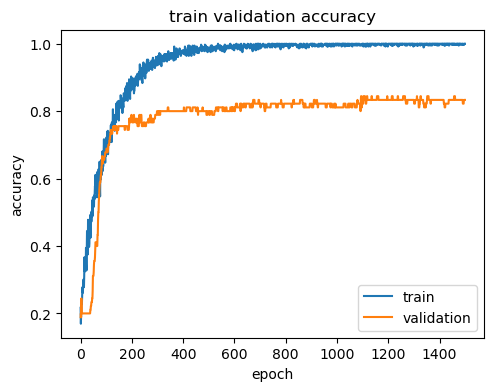

In [ ]:
# Train and Validation accuracy and loss
f = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.title('train validation accuracy')
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')


# plt.subplot(1,2,2)
# plt.title('train validation loss')
# plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])
# plt.legend(['train','validation'])
# plt.xlabel('epoch')
# plt.ylabel('loss')

In [ ]:
y_prob = model1.predict(X1_test_scaled)
y_pred = np.argmax(y_prob, axis = -1)

NameError: name 'model1' is not defined

In [ ]:
# Accuracy
acc_1d = round(accuracy_score(y_pred,y1_test),2)

In [ ]:
cm_1d = confusion_matrix(y1_test,y_pred)
cm_display_1d = ConfusionMatrixDisplay(confusion_matrix = cm_1d, display_labels = ['Angry', 'Happy', 'Relaxed', 'Sad'])

In [ ]:
print(classification_report(y1_test, y_pred, target_names = ['Angry', 'Happy', 'Relaxed', 'Sad']))
cm_display_1d.plot()
plt.show()

In [ ]:
# Train and Validation accuracy and loss
f = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.title('train validation accuracy')
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(1,2,2)
plt.title('train validation loss')
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
y_prob = model11.predict(X2_test_scaled)
y_pred = np.argmax(y_prob, axis = -1)

In [ ]:
# Accuracy
acc_1d = round(accuracy_score(y_pred,y2_test),2)

In [ ]:
# Confusion Matrix
cm_1d = confusion_matrix(y2_test,y_pred)
cm_display_1d = ConfusionMatrixDisplay(confusion_matrix = cm_1d, display_labels = ['Angry', 'Happy', 'Relaxed', 'Sad'])

In [ ]:
model11.save('Features1D/Model/Conv1D.h5')

In [ ]:
print(classification_report(y2_test, y_pred, target_names = ['Angry', 'Happy', 'Relaxed', 'Sad']))
cm_display_1d.plot()
plt.show()